In [1]:
import pandas as pd
import sqlalchemy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set
%matplotlib inline


In [224]:
'''KRAKÓW'''

data_all=data_all2.copy()
data_all.drop(columns='date',inplace=True)

data_all.drop(columns=['year_built','price_per_m2','link'],inplace=True)

data_all.shape

def accommodation(x):
    if 'mieszkanie' in x.lower():
        return 'whole flat'
    elif 'pokój' in x.lower() and 'kawalerka' not in x.lower():
        return 'room'
    else:
        return 'whole flat'

def market_type_format(x):
    if 'prywatne' in x.lower():
        return 'Private AD'
    else:
        return "Company's AD"

def rent_format(x):
    try:
        return float(x)
    except Exception:
        return 0



def building_type_format(x):
    if 'Blok' in x:
        return 'Block of flats'
    elif 'Apartamentowiec' in x:
        return 'Apartment building'
    elif 'Kamienica' in x:
        return 'Tenement'
    elif 'Domwolnostojący' in x:
        return 'A detached house'
    else:
        return 'Other'

def if_street_name(x):
    if 'ul' in x.lower():
        return 'yes'
    else:
        return 'no'

def furnish_format(x):
    if 'tak' in x.lower():
        return 'yes'
    else:
        return 'no'

def if_neighborhood_name(x):
    if 'os' in x.lower():
        return 'yes'
    else:
        return 'no'

def if_neighborhood_quality(x):
    if 'okolica' in x.lower():
        return 'yes'
    else:
        return 'no'

def if_quality_mentioned(x):
    if 'stan' in x.lower():
        return 'yes'
    else:
        return 'no'

def if_distance_mentioned(x):
    if 'minu' in x.lower():
        return 'yes'
    else:
        return 'no'

def if_parking_mentioned(x):
    if 'paking' in x.lower():
        return 'yes'
    else:
        return 'no'

def if_communication_mentioned(x):
    if 'przystan' in x.lower() or 'tramw' in x.lower() or 'autob' in x.lower() or 'pociąg' in x.lower():
        return 'yes'
    else:
        return 'no'

def if_shop_mentioned(x):
    if 'sklep' in x.lower() or 'market' in x.lower():
        return 'yes'
    else:
        return 'no'

data_all.replace('NaN',np.nan,inplace=True)
data_all.replace('Brak',np.nan,inplace=True)
data_all.replace('brak',np.nan,inplace=True)
data_all.replace('br',np.nan,inplace=True)
data_all.replace('b',np.nan,inplace=True)
data_all.dropna(inplace=True)

data_krk=data_all.loc[(data_all.city=='krakow')&(data_all.offer_type=='wynajem')].copy()
data_krk.drop(columns=['city','offer_type'],inplace=True)

data_krk['accommodation']=data_krk.title.apply(lambda x: accommodation(x))
data_krk['is_street_mentioned']=data_krk.description.apply(lambda x: if_street_name(x))
data_krk['if_furnished']=data_krk.description.apply(lambda x: furnish_format(x))
data_krk['is_distance_mentioned']=data_krk.description.apply(lambda x: if_distance_mentioned(x))
data_krk['is_type_of_communication_mentioned']=data_krk.description.apply(lambda x: if_communication_mentioned(x))
data_krk['is_shop_mentioned']=data_krk.description.apply(lambda x: if_shop_mentioned(x))


data_krk.total_price=data_krk.total_price.astype(float)

data_krk.total_sqm=data_krk.total_sqm.astype(float)
data_krk.no_of_rooms=data_krk.no_of_rooms.astype(int)
data_krk.rent=data_krk.rent.apply(lambda x: rent_format(x))
data_krk.rent=data_krk.rent.astype(float)

data_krk.total_price=data_krk.total_price+data_krk.rent
data_krk.drop(columns='rent',inplace=True)
data_krk.drop_duplicates(inplace=True)
data_krk.building_type=data_krk['building_type'].apply(lambda x:building_type_format(x) )
data_krk.market_type=data_krk['market_type'].apply(lambda x:market_type_format(x) )

''''''
'''drop description'''
data_krk.drop(columns=['description','title'],inplace=True)
''''''
data_krk.reset_index(inplace=True)
data_krk.drop(columns='index',inplace=True)

distr=pd.DataFrame(data_krk.district.value_counts())
distr_other=distr.loc[distr['district']<100].index.tolist()

data_krk.loc[data_krk['district'].isin(distr_other),'district']='Other'

print(data_krk.info())
data_krk

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5349 entries, 0 to 5348
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   promoted                            5349 non-null   object 
 1   web_page                            5349 non-null   object 
 2   market_type                         5349 non-null   object 
 3   total_price                         5349 non-null   float64
 4   floor                               5349 non-null   object 
 5   if_furnished                        5349 non-null   object 
 6   building_type                       5349 non-null   object 
 7   total_sqm                           5349 non-null   float64
 8   no_of_rooms                         5349 non-null   int32  
 9   district                            5349 non-null   object 
 10  accommodation                       5349 non-null   object 
 11  is_street_mentioned                 5349 no

,promoted,web_page,market_type,total_price,floor,if_furnished,building_type,total_sqm,no_of_rooms,district,accommodation,is_street_mentioned,is_distance_mentioned,is_type_of_communication_mentioned,is_shop_mentioned
0,no,olx,Private AD,1045.0,1,no,Block of flats,51.7,2,Krowodrza,room,yes,no,yes,yes
1,no,olx,Private AD,1700.0,5,yes,Block of flats,40.0,2,PrądnikBiały,whole flat,no,yes,yes,no
2,no,otodom,Company's AD,2600.0,3,yes,Apartment building,37.0,2,Grzegórzki,whole flat,yes,yes,yes,yes
3,yes,olx,Private AD,2400.0,1,yes,Block of flats,50.0,2,StareMiasto,whole flat,no,yes,yes,yes
4,no,olx,Private AD,1800.0,1,yes,Tenement,35.0,1,StareMiasto,whole flat,yes,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5344,no,olx,Private AD,2165.0,2,no,Block of flats,40.0,1,Grzegórzki,whole flat,yes,yes,yes,no
5345,no,olx,Private AD,1900.0,2,no,Apartment building,34.0,1,Bronowice,whole flat,yes,yes,yes,no
5346,no,olx,Company's AD,1800.0,1,yes,A detached house,64.0,3,PrądnikBiały,whole flat,no,no,no,no
5347,no,olx,Private AD,2500.0,4,no,Apartment building,38.0,2,Bronowice,whole flat,yes,no,yes,yes


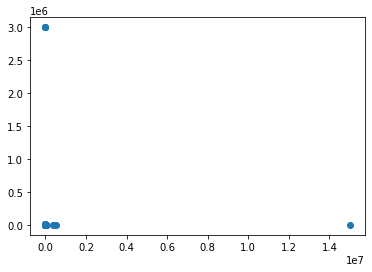

In [225]:
plt.scatter(x=data_krk.total_price,y=data_krk.total_sqm)

<AxesSubplot:xlabel='total_price', ylabel='total_sqm'>

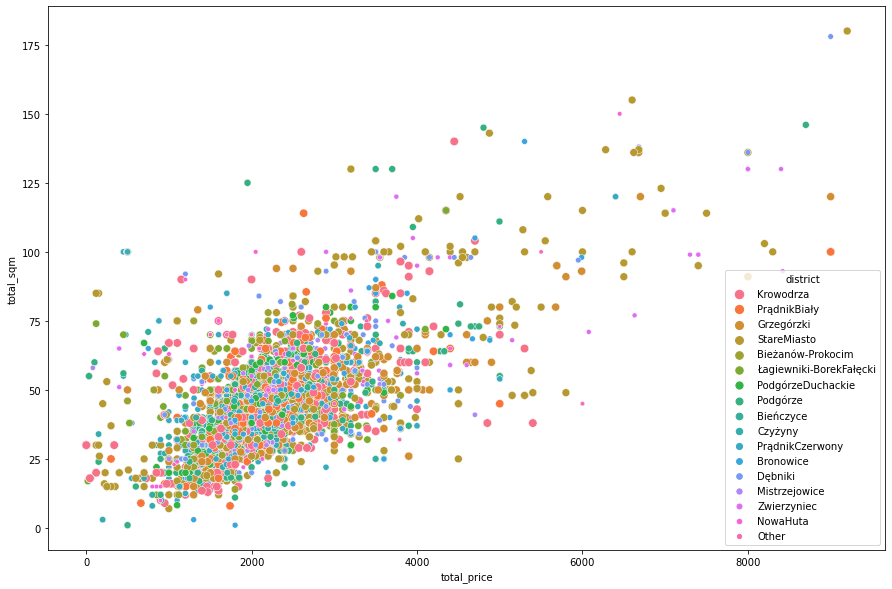

In [229]:
'drop data errors'
data_krk.drop(data_krk.loc[data_krk.total_price>=data_krk.total_price.quantile(.995)].index,inplace=True)
data_krk.drop(data_krk.loc[data_krk.total_sqm>=data_krk.total_sqm.quantile(.998)].index,inplace=True)
plt.figure(figsize=(15,10))
sn.scatterplot(x=data_krk.total_price,y=data_krk.total_sqm,size=data_krk.district,hue=data_krk.district)

<AxesSubplot:xlabel='total_price', ylabel='total_sqm'>

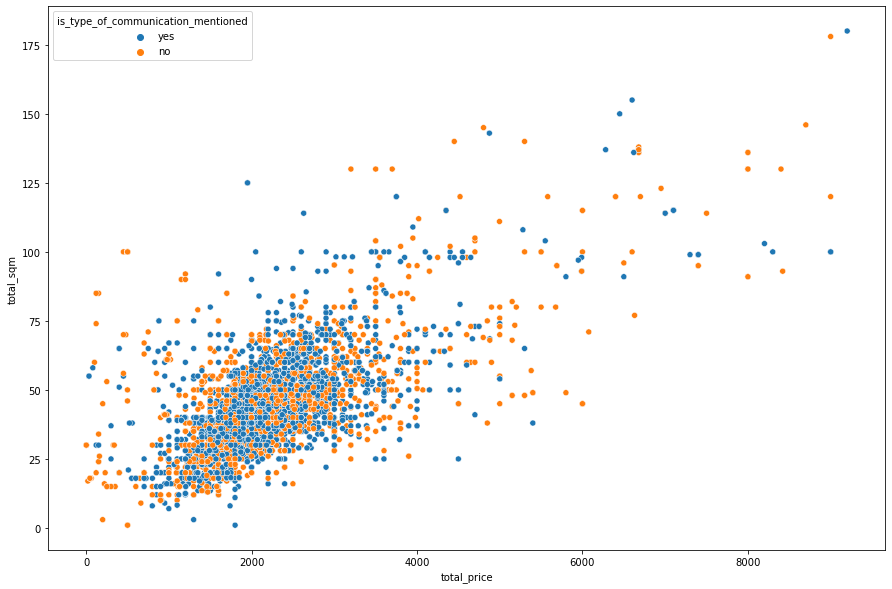

In [230]:
plt.figure(figsize=(15,10))
sn.scatterplot(x=data_krk.total_price,y=data_krk.total_sqm,hue=data_krk.is_type_of_communication_mentioned)

<AxesSubplot:>

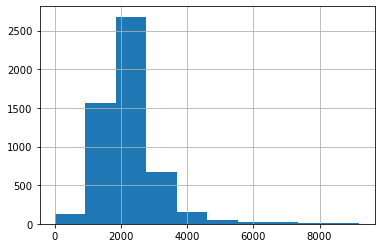

In [231]:
data_krk.total_price.hist()

In [232]:
round(data_krk.groupby(['district'])['total_sqm'].agg('mean').to_frame(),2).reset_index().sort_values(['total_sqm'],ascending=False)

,district,total_sqm
15,Zwierzyniec,63.88
4,Dębniki,47.05
14,StareMiasto,46.90
8,NowaHuta,45.92
16,Łagiewniki-BorekFałęcki,45.85
9,Other,45.13
2,Bronowice,44.90
13,PrądnikCzerwony,43.72
12,PrądnikBiały,43.41
5,Grzegórzki,43.36


In [233]:
data_krk.district.value_counts()

StareMiasto                662
Krowodrza                  562
PrądnikCzerwony            469
Grzegórzki                 462
Podgórze                   462
Dębniki                    428
PrądnikBiały               393
PodgórzeDuchackie          296
Bronowice                  280
Bieżanów-Prokocim          265
Łagiewniki-BorekFałęcki    251
Czyżyny                    183
Bieńczyce                  160
Mistrzejowice              137
NowaHuta                   127
Zwierzyniec                102
Other                       72
Name: district, dtype: int64

In [234]:
round(data_krk.accommodation.value_counts(normalize=True),2)

whole flat    0.98
room          0.02
Name: accommodation, dtype: float64

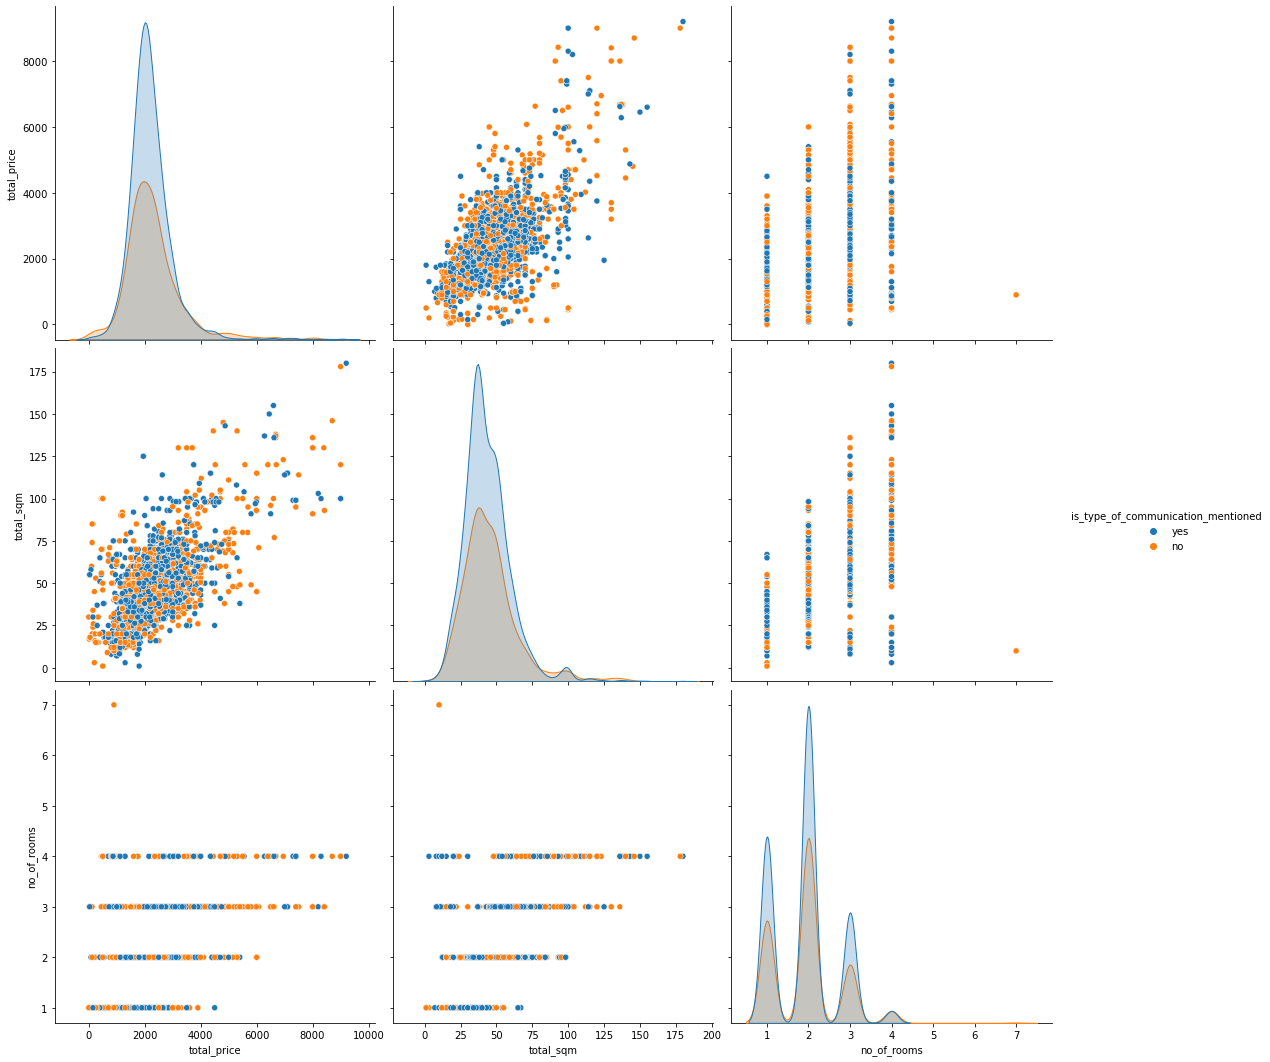

In [235]:
# plt.subplots(figsize=(10,10))
_=sn.pairplot(data_krk,hue='is_type_of_communication_mentioned',height=5)

In [236]:
from sklearn.preprocessing import StandardScaler

numFeatures=['total_price','total_sqm','no_of_rooms']

charFeatures=[feature for feature in data_krk.columns.tolist() if feature not in numFeatures]
dummies=pd.get_dummies(data=data_krk[charFeatures],drop_first=True)

features=pd.concat([data_krk[numFeatures],dummies],axis=1)

scaler=StandardScaler()
features_scaled=scaler.fit_transform(features)
Y=features_scaled[:,0]
X=features_scaled[:,1:]

Y.shape, X.shape


((5311,), (5311, 43))

In [237]:
from sklearn.model_selection import KFold,train_test_split,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


forest=RandomForestRegressor()
XGB=XGBRegressor()

In [238]:
def train_test_model(model,
                    X,Y,
                    n_splits_=10,
                    test_size=0.2,
                    random_state=42,
                    shuffle=True,
                    param_grid={}):
    
    param_grid=param_grid

    kf=KFold(n_splits=n_splits_,random_state=random_state,shuffle=shuffle)
    
    X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=test_size,random_state=random_state,shuffle=shuffle)

    cv=RandomizedSearchCV(model,param_grid,cv=kf)
    
    cv.fit(X_train,y_train)
    y_pred=cv.predict(X_test)
    y_pred_train=cv.predict(X_train)
    


    #TEST
    R2_test=r2_score(y_pred=y_pred,y_true=y_test)
    MSE_test=mean_squared_error(y_pred=y_pred,y_true=y_test)
    MAE_test=mean_absolute_error(y_pred=y_pred,y_true=y_test)

    #TRAIN
    R2_train=r2_score(y_pred=y_pred_train,y_true=y_train)
    MSE_train=mean_squared_error(y_pred=y_pred_train,y_true=y_train)
    MAE_train=mean_absolute_error(y_pred=y_pred_train,y_true=y_train)


        
    
    results={'Test_results':{'Best_params':cv.best_params_,
                             'estimator':cv,
                             'X_test':X_test,
                             'y_test':y_test,
                             'title':str(model).replace('()',''),
                             'R2':R2_test,
                             'MSE':MSE_test,
                             'MAE':MAE_test,
                             
                             },
                             
             'Train_results':{'R2':R2_train,
                              'MAE':MAE_train,
                              'MSE':MSE_train,
                              }
                             }


        
    return results

In [239]:
def warn(*args,**kwargs):
	pass
import warnings 
warnings.warn=warn



print('''Forest''')
forest_param_grid={'n_estimators':[50,100,200,300,400,500,1000],
                   'min_samples_split':[2,3,4,5,6,7,8,9,10],
                   'max_depth':[10,12],
                   'warm_start':[True,False]}


forest=RandomForestRegressor(warm_start=False,n_estimators=400,min_samples_split=2,max_depth=10)

results_forest=train_test_model(forest,X,Y,test_size=0.2,param_grid=forest_param_grid)


print('''XGB''')
XGB_param_grid={'booster':['gbtree','gblinear'],
                'eta':[0.03,0.05,0.1,0.3,0.5],
                'n_estimators':[100,200,300,500],
                'max_depth':[6,10,12],
                'verbose':[0]
}
                
results_XGB=train_test_model(XGB,X,Y,test_size=0.2,param_grid=XGB_param_grid)



Forest
XGB
[21:26:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "max_depth", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "max_depth", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:26:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "max_depth", "verbose" } might not be used.

  This could be a false alarm, wi

In [240]:
'''FEATURES IMPORTANCES'''

X_features=features.drop(columns='total_price')
X_features=X_features.columns.tolist()


summary_features=round(pd.DataFrame([results_forest['Test_results']['estimator'].best_estimator_.feature_importances_,
                results_XGB['Test_results']['estimator'].best_estimator_.feature_importances_],
                columns=X_features).rename({0:'RandomForestClassifier',1:'GradientBoostingClassifier'}),3)

summary_features

,total_sqm,no_of_rooms,promoted_yes,web_page_otodom,market_type_Private AD,floor_10,floor_2,floor_3,floor_4,floor_5,...,district_PrądnikBiały,district_PrądnikCzerwony,district_StareMiasto,district_Zwierzyniec,district_Łagiewniki-BorekFałęcki,accommodation_whole flat,is_street_mentioned_yes,is_distance_mentioned_yes,is_type_of_communication_mentioned_yes,is_shop_mentioned_yes
RandomForestClassifier,0.578,0.053,0.004,0.021,0.014,0.000,0.011,0.010,0.006,0.006,...,0.004,0.010,0.016,0.010,0.007,0.017,0.012,0.011,0.018,0.012
GradientBoostingClassifier,0.047,0.034,0.004,0.016,0.008,0.005,0.012,0.012,0.009,0.012,...,0.010,0.011,0.024,0.034,0.017,0.059,0.015,0.011,0.026,0.015


In [241]:
'''RESULTS SUMMARY'''
results_set=[results_forest,results_XGB]

resuls_dict={}
for el in results_set:
    resuls_dict[el['Test_results']['title'][:12]]=[el['Train_results']['R2'],el['Train_results']['MSE'] ,el['Test_results']['R2'],el['Test_results']['MSE'],el['Test_results']['Best_params']]
    
round(pd.DataFrame(resuls_dict).rename({0:'R2_train',1:'MSE_train',2:'R2_test',3:'MSE_test',4:'Best_params'}),4).T

,R2_train,MSE_train,R2_test,MSE_test,Best_params
RandomForest,0.840177,0.149498,0.712732,0.360574,"{'warm_start': False, 'n_estimators': 500, 'mi..."
XGBRegressor,0.982621,0.016256,0.750203,0.313542,"{'verbose': 0, 'n_estimators': 500, 'max_depth..."


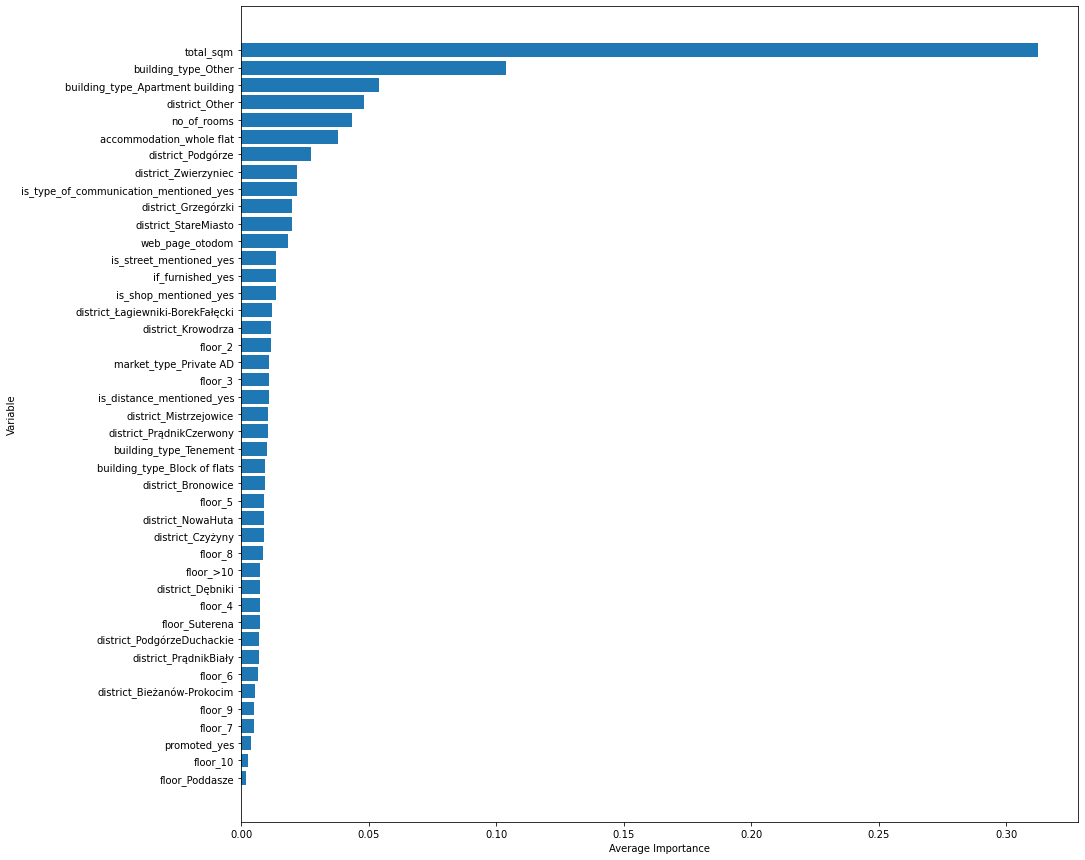

In [242]:
plot_data=pd.pivot_table(data=summary_features.melt(),index='variable',values='value',aggfunc='mean').reset_index().sort_values(by='value')

plt.subplots(figsize=(15, 15))
plt.barh(y=plot_data['variable'],width=plot_data['value'])
plt.ylabel('Variable')
plt.xlabel('Average Importance')
plt.show()

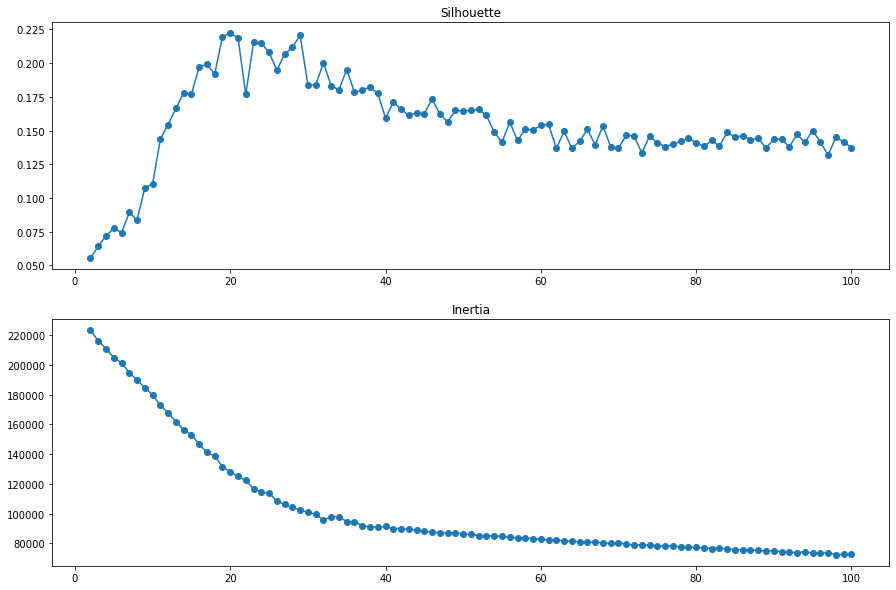

In [243]:
from sklearn.cluster import KMeans,DBSCAN,MeanShift
from sklearn.metrics import silhouette_samples, silhouette_score

n=list(range(2,101))

predictions_km=[]
inertias_km=[]
silhouettes_km=[]

for cluster in n:
    km=KMeans(n_clusters=cluster,init='k-means++')
    preds=km.fit_predict(features_scaled)
    

    predictions_km.append(preds)
    inertias_km.append(km.inertia_)
    silhouettes_km.append(silhouette_score(features_scaled,preds))

fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.title('Silhouette')
ax1=plt.plot(list(range(2,101)),silhouettes_km)
ax1=plt.scatter(list(range(2,101)),silhouettes_km)


plt.subplot(2, 1, 2)
plt.title('Inertia')
ax2=plt.plot(list(range(2,101)),inertias_km)
ax2=plt.scatter(list(range(2,101)),inertias_km)


In [244]:
def plot_clusters(preds):
	plt.subplots(figsize=(20,10))
	clusters = np.unique(preds)
	# create scatter plot for samples from each cluster
	for cluster in clusters:
		# get row indexes for samples with this cluster
		row_ix = np.where(preds == cluster)
		# create scatter of these samples
		plt.scatter(X[row_ix, 0], X[row_ix, 1])
	# show the plot
	plt.show()

K-Means clusters: 18
K-Means No. of clusters: 18


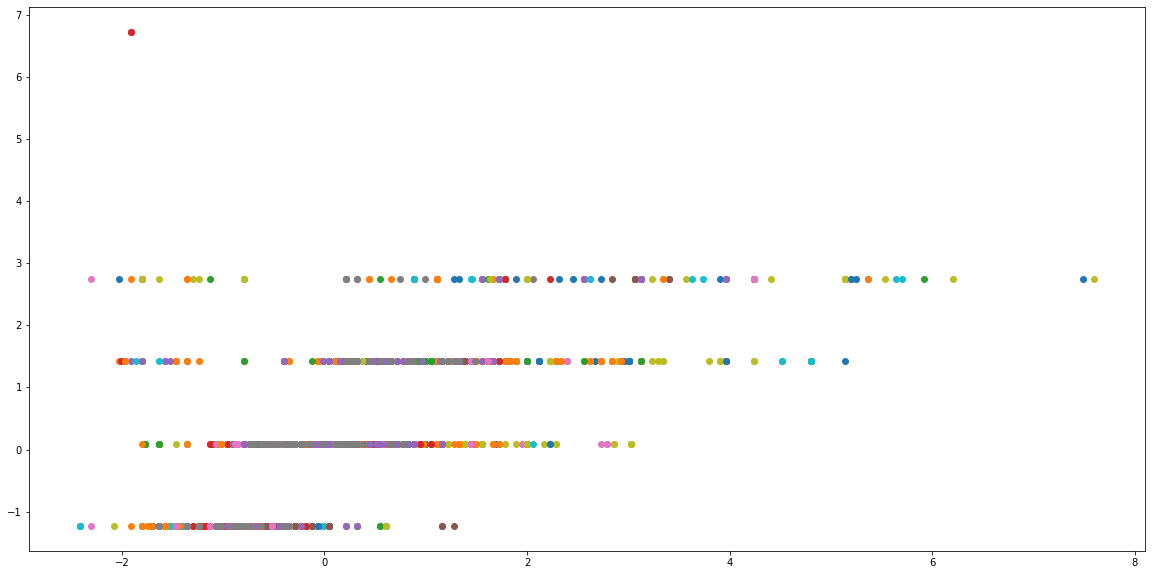

In [245]:
normalized_features2=features_scaled.copy()
print('K-Means clusters:',silhouettes_km.index(max(silhouettes_km)))

#for max silhuette
kmeans=KMeans(
    silhouettes_km.index(max(silhouettes_km)))

kmeans.fit(features_scaled)
preds=kmeans.labels_
kmeans.predict(features_scaled)

print('K-Means No. of clusters:',len(np.unique(preds)))
plot_clusters(preds)

Mean Shift No. of clusters: 16


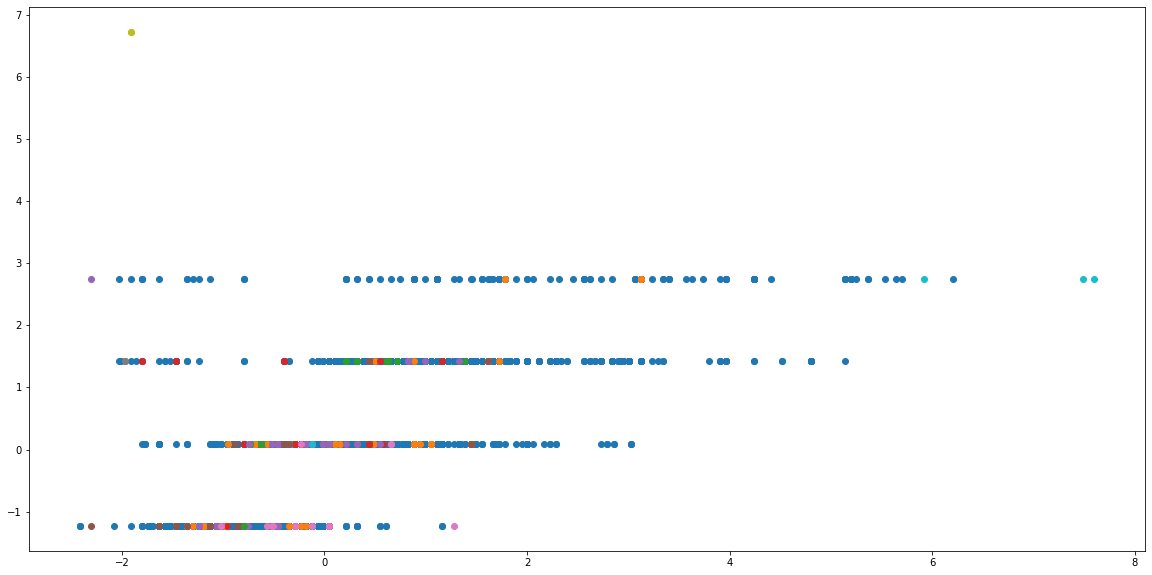

In [246]:
cluster_model_MS=MeanShift()
cluster_model_MS.fit(features_scaled)
predctions_MS=cluster_model_MS.predict(features_scaled)

print('Mean Shift No. of clusters:',len(np.unique(predctions_MS)))
plot_clusters(predctions_MS)

DBSCAN No. of clusters: 22


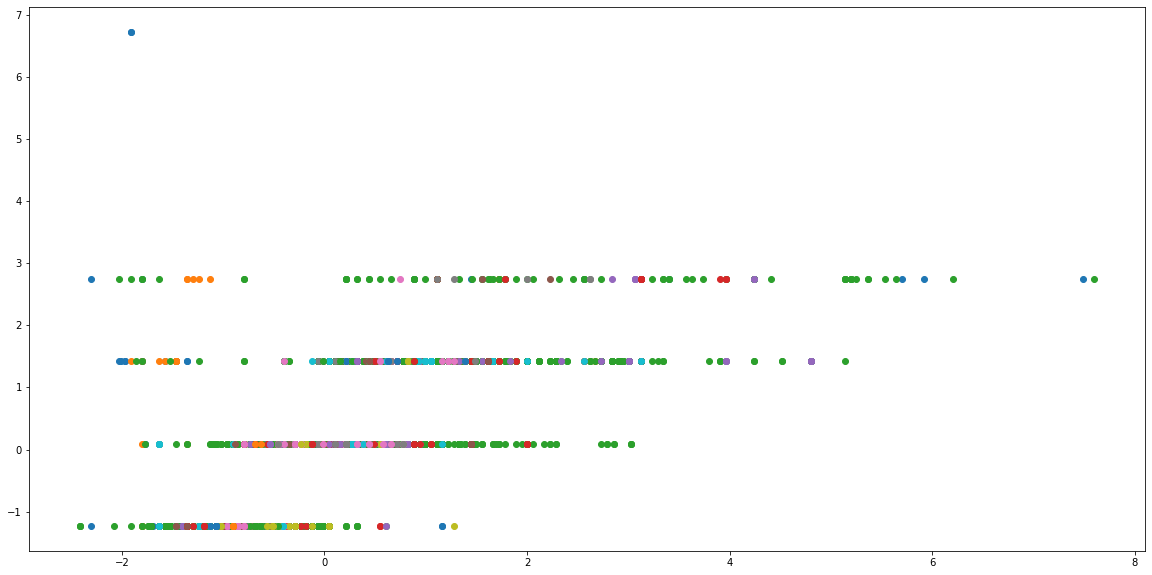

In [247]:
cluster_model_DB=DBSCAN(eps=6)
cluster_model_DB.fit(features_scaled)
predctions_DB=cluster_model_DB.fit_predict(features_scaled)

print('DBSCAN No. of clusters:',len(np.unique(predctions_DB)))
plot_clusters(predctions_DB)

In [248]:
km_c=pd.DataFrame(preds).rename({0:'Cluster_km'},axis=1).reset_index()
km_c=km_c.drop(columns='index')
ms_c=pd.DataFrame(predctions_MS).rename({0:'Cluster_MS'},axis=1).reset_index()
ms_c.drop(columns='index',inplace=True)
db_c=pd.DataFrame(predctions_DB).rename({0:'Cluster_DB'},axis=1).reset_index()
db_c.drop(columns='index',inplace=True)

In [249]:
features_scaled=scaler.fit_transform(features)
features_scaled=pd.DataFrame(features_scaled,columns=features.columns)

features_scaled_km=pd.concat([features_scaled,km_c],axis=1)
features_scaled_ms=pd.concat([features_scaled,ms_c],axis=1)
features_scaled_db=pd.concat([features_scaled,db_c],axis=1)

'''KM'''
Y=features_scaled_km['total_price']
Y_km=Y.values
X=features_scaled_km.drop(columns='total_price')
X_km=X.values
'''MS'''
Y=features_scaled_ms['total_price']
Y_ms=Y.values
X=features_scaled_ms.drop(columns='total_price')
X_ms=X.values
'''DB'''
Y=features_scaled_db['total_price']
Y_db=Y.values
X=features_scaled_db.drop(columns='total_price')
X_db=X.values

In [250]:
print(results_XGB['Test_results']['estimator'].best_params_)

final_model=XGBRegressor(n_estimators = 500, max_depth = 6, eta = 0.08, booster = 'gbtree')

{'verbose': 0, 'n_estimators': 500, 'max_depth': 10, 'eta': 0.05, 'booster': 'gbtree'}


In [251]:
results_XGB=train_test_model(final_model,X,Y)
results_km=train_test_model(final_model,X_km,Y_km)
results_ms=train_test_model(final_model,X_ms,Y_ms)
results_db=train_test_model(final_model,X_db,Y_db)

In [252]:
results_set2=[results_XGB,results_km,results_ms,results_db]
names=['No Unsupervised Learning','K-Means','Mean Shift','DBSCAN']


resuls_dict2={}
for i,el in enumerate(results_set2):
    resuls_dict2[names[i]]=[el['Train_results']['R2'],el['Train_results']['MSE'] ,el['Test_results']['R2'],el['Test_results']['MSE'],el['Test_results']['Best_params']]
    
round(pd.DataFrame(resuls_dict2).rename({0:'R2_train',1:'MSE_train',2:'R2_test',3:'MSE_test',4:'Best_params'}),4)

,No Unsupervised Learning,K-Means,Mean Shift,DBSCAN
R2_train,0.926784,0.924006,0.917275,0.926784
MSE_train,0.068486,0.071085,0.077381,0.068486
R2_test,0.752124,0.754748,0.750571,0.752124
MSE_test,0.311129,0.307837,0.313079,0.311129
Best_params,{},{},{},{}


In [217]:
'TESTOWANIE NA NIEWIDZINANYCH DANYCH'
results1=[]
results2=[]
results3=[]
for x in range(5):

    X_fin=pd.DataFrame(X_km,columns=features_scaled_ms.columns.drop('total_price'))
    Y_fin=pd.DataFrame(Y_km,columns=['total_price'])

    data_final=pd.concat([X_fin,Y_fin],axis=1)

    validation_set=data_final.sample(frac=0.05)
    train_test_set=data_final.drop(validation_set.index)
    Y=train_test_set['total_price']
    X=train_test_set.drop(columns='total_price')

    Y_val=validation_set['total_price']
    X_val=validation_set.drop(columns='total_price')

    '------'
    kf=KFold(n_splits=15,random_state=42,shuffle=True)
    X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)
    cv=RandomizedSearchCV(final_model,{},cv=kf)
    cv.fit(X_train,y_train)
    '------'

    # print(x+1,'/',50)

    y_pred=cv.predict(X_train)
    results1.append(r2_score(y_pred,y_train))

    y_pred=cv.predict(X_test)
    results2.append(r2_score(y_pred,y_test))
    

    y_pred=cv.predict(X_val)
    results3.append(r2_score(y_pred,Y_val))

print('treningowy:',np.mean(results1))
print('testowy:',np.mean(results2))
print('walidacyjny:',np.mean(results3))

treningowy: 0.9226599767369368
testowy: 0.5624358534353397
walidacyjny: 0.690277499462268


In [218]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


def create_model(first_layer_init='uniform',
				 first_later_activation='relu',
				 first_layer_density=12,

				 no_of_hidden_layers=1,
				 hidden_layer_density=1,
				 hidden_layer_init='uniform',
				 hidden_layer_activation='relu',

				 last_layer_init='uniform',
				 last_layer_activation='sigmoid',
				 
				 optimizer='adam',
				 loss_function='mse',
				 metrics=['mse','mae']

				):
	# create model
	model = Sequential()

	# first layer
	model.add(Dense(first_layer_density, input_dim=X.shape[1], kernel_initializer=first_layer_init, activation=first_later_activation))

	# hidden layers
	for el in range(1,no_of_hidden_layers+1):
		model.add(Dense(hidden_layer_density, kernel_initializer=hidden_layer_init, activation=hidden_layer_activation))

	# last layer
	model.add(Dense(1, kernel_initializer=last_layer_init, activation=last_layer_activation))
	
	# Compile model
	model.compile(loss=loss_function, optimizer=optimizer, metrics=metrics)

	return model


	

model = KerasRegressor(build_fn=create_model, epochs=300, batch_size=None, verbose=0)

In [102]:
NN_param_grid={'first_layer_init' : ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform','he_normal', 'he_uniform'],
               'hidden_layer_init' : ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'],
               'last_layer_init' : ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'],
        
               'first_layer_density' : [10, 20, 30, 50, 100],
               'no_of_hidden_layers' : [1, 2, 3, 5, 10],
               'hidden_layer_density' : [10, 20, 30, 50, 100],

               'first_later_activation' : ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
               'hidden_layer_activation' : ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
               'last_layer_activation' : ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],

               'optimizer' : ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

            }

NN_results=train_test_model(model,X_km,Y_km,param_grid=NN_param_grid)



In [219]:
NN_results['Test_results']['Best_params']

{'optimizer': 'SGD',
 'no_of_hidden_layers': 5,
 'last_layer_init': 'he_uniform',
 'last_layer_activation': 'tanh',
 'hidden_layer_init': 'lecun_uniform',
 'hidden_layer_density': 100,
 'hidden_layer_activation': 'tanh',
 'first_layer_init': 'uniform',
 'first_layer_density': 20,
 'first_later_activation': 'softplus'}

In [220]:
model_fin=create_model(optimizer= 'SGD',
 no_of_hidden_layers= 5,
 last_layer_init= 'he_uniform',
 last_layer_activation= 'tanh',
 hidden_layer_init= 'lecun_uniform',
 hidden_layer_density= 100,
 hidden_layer_activation= 'tanh',
 first_layer_init='uniform',
 first_layer_density= 20,
 first_later_activation='softplus')

In [222]:
scores_NN=[]

epochs=[300]
batch_size=[None]
                

for epoch in epochs:
    for batch in batch_size:

        X_train, X_test, y_train, y_test=train_test_split(X_km,Y_km,test_size=0.2,random_state=42,shuffle=True)
        run_hist_1 = model_fin.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epoch,batch_size=batch,verbose=0)
        y_pred=model_fin.predict(X_test)
        scores_NN.append(r2_score(y_test,y_pred)) 
        
scores_NN

[0.3949178229600465]